Index(['detectedActivity', 'geoHash', 'minuteOfDay', 'weekday', 'journey'], dtype='object')


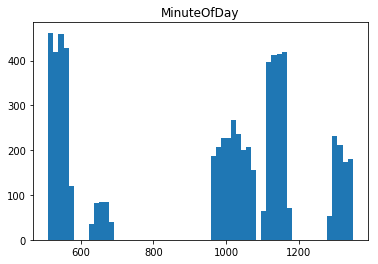

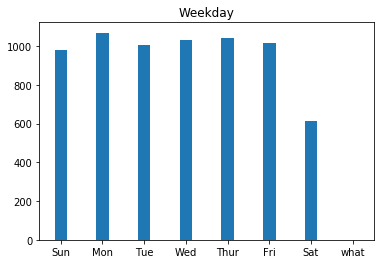

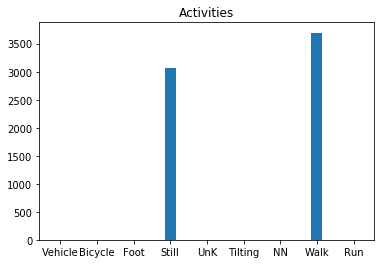

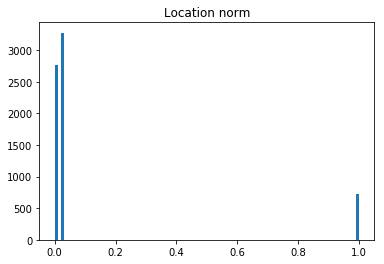

Unique locations and frequence
[1242207347 1242212679 1242213175 1242213299 1242479279 1242479403
 1254857331 1254862663 1254867995 1254873327]
[   3  850  155 1760 1879 1395   20  125   67  505]


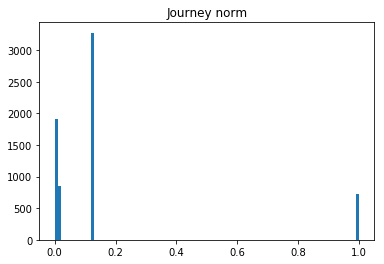

Unique journeys and frequence
[8000081216 8014081216 8121680000 8121680140 8121690042 9004281216]
[1915  850 1890 1063  324  717]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.spatial.distance
df = pd.read_csv("data/tnK534JMwwfhvUEycn69HPbhqkt2.csv",comment="-")#Maria
#df = pd.read_csv("data/ehaBtfOPDNZjzy1MEvjQmGo4Zv12.csv",comment="-")#Andrea
#df = pd.read_csv("data/hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2.csv",comment="-") #Bjorn
#df = pd.read_csv("data/fo.csv",comment="-")
print(df.columns)
trainingData = np.array(df)
plt.title("MinuteOfDay")
plt.hist(trainingData[:,2],60)
plt.show()
#Weekday
names=["Sun","Mon","Tue","Wed","Thur","Fri","Sat","what"]
plt.title("Weekday")
x=plt.bar(names,np.bincount(trainingData[:,3],minlength=8),0.3,)
plt.show()
#Activities
names=["Vehicle","Bicycle","Foot","Still","UnK","Tilting","NN","Walk","Run"]
plt.title("Activities")
x=plt.bar(names,np.bincount(trainingData[:,0],minlength=9),0.3,)
plt.show()
#Location
#plt.title("Location")
#result2=np.true_divide(trainingData[:,1],10000)
#plt.hist(result2,100)
#plt.show()
#Norm location
plt.title("Location norm")
mindiff = trainingData[:,1]-trainingData[:,1].min()
norm = mindiff/(trainingData[:,1].max()-trainingData[:,1].min())
plt.hist(norm,100)
plt.show()
unique, counts =np.unique(trainingData[:,1],return_counts=3)
print ("Unique locations and frequence")
print(unique)
print(counts)
#Journeys
#plt.title("Journeys (Labels)")
#result2=np.true_divide(trainingData[:,:4],10000)
#plt.hist(result2,100)
#plt.show()
plt.title("Journey norm")
mindiff = trainingData[:,4]-trainingData[:,4].min()
norm = mindiff/(trainingData[:,4].max()-trainingData[:,4].min())
plt.hist(norm,100)
plt.show()
unique, counts =np.unique(trainingData[:,4],return_counts=3)
print ("Unique journeys and frequence")
print(unique)
print(counts)

### Shuffle and save test valid and training set

In [3]:
#Shuffle and save to foo.csv
#user = "tnK534JMwwfhvUEycn69HPbhqkt2" #Maria
user = "ehaBtfOPDNZjzy1MEvjQmGo4Zv12"#Andrea
#user = "hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2" #Bjorn
df = pd.read_csv("data/"+user+".csv",comment="-")
trainingData = np.array(df)
np.random.shuffle(trainingData)
#Select the test set.
#get 10%
r = np.random.choice(trainingData.shape[0], int(0.1*trainingData.shape[0]))
test_set=trainingData[r]
trainingData = np.delete(trainingData, r, 0)
#save test set
np.savetxt("data/"+user+"_test.csv", test_set, delimiter=",",fmt="%d",header=','.join(df.columns),comments="")
#save train and valid set
np.savetxt("data/"+user+"_train_valid.csv", trainingData, delimiter=",",fmt="%d",header=','.join(df.columns),comments="")

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
#Shuffle the teaching data
user = "tnK534JMwwfhvUEycn69HPbhqkt2" #Maria
#user = "ehaBtfOPDNZjzy1MEvjQmGo4Zv12"#Andrea
#user = "hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2" #Bjorn
df = pd.read_csv("data/"+user+"_teaching_set.csv")
trainingData = np.array(df)
np.random.shuffle(trainingData)
np.savetxt("data/"+user+"_teaching2_set.csv", trainingData, delimiter=",",fmt="%d",header=','.join(df.columns),comments="")

In [30]:
','.join(df.columns)

'detectedActivity,geoHash,minuteOfDay,weekday,journey'

In [128]:
#df["detectedActivity"]
df.shape[0]

6759

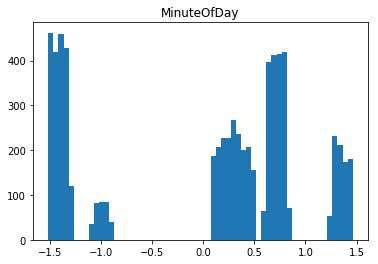

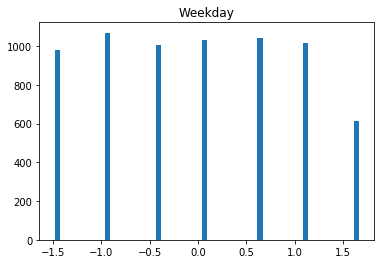

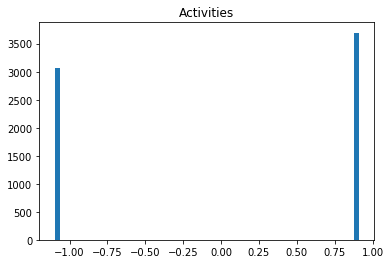

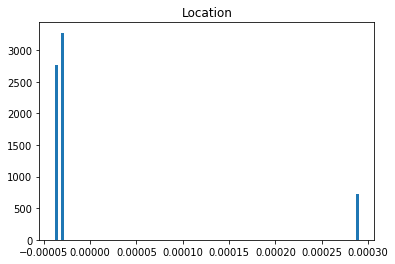

Unique locations and frequence
[-0.38321 -0.38183 -0.3817  -0.38167 -0.31268 -0.31265  2.89793  2.89932  2.9007   2.90208]
[   3  850  155 1760 1879 1395   20  125   67  505]


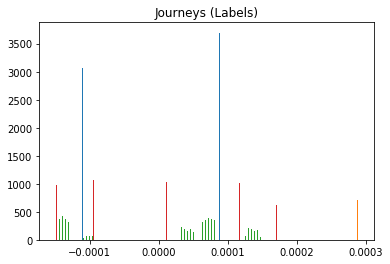

Unique journeys and frequence
[8000081216 8014081216 8121680000 8121680140 8121690042 9004281216]
[1915  850 1890 1063  324  717]


In [139]:
from fastai.imports import *
#from fastai.conv_learner import *
from fastai.structured import *
#from fastai.column_data import *
PATH = "data/foo.csv"
df = pd.read_csv(PATH)
ds, y, nas, mapper = proc_df(df, 'journey', do_scale=True)
#print(ds)
#print(y)
trainingData = np.array(ds)
plt.title("MinuteOfDay")
plt.hist(trainingData[:,2],60)
plt.show()
#Weekday
names=["Sun","Mon","Tue","Wed","Thur","Fri","Sat","what"]
plt.title("Weekday")
plt.hist(trainingData[:,3],60)
#x=plt.bar(names,trainingData[:,3],minlength=8,0.3,)
plt.show()
#Activities
names=["Vehicle","Bicycle","Foot","Still","UnK","Tilting","NN","Walk","Run"]
plt.title("Activities")
plt.hist(trainingData[:,0],60)
#x=plt.bar(names,np.bincount(trainingData[:,0],minlength=9),0.3,)
plt.show()
#Location
plt.title("Location")
result2=np.true_divide(trainingData[:,1],10000)
plt.hist(result2,100)
plt.show()
unique, counts =np.unique(trainingData[:,1],return_counts=3)
print ("Unique locations and frequence")
print(unique)
print(counts)
#Journeys
plt.title("Journeys (Labels)")
result2=np.true_divide(trainingData[:,:4],10000)
plt.hist(result2,100)
plt.show()
unique, counts =np.unique(np.array(y),return_counts=3)
print ("Unique journeys and frequence")
print(unique)
print(counts)